In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from scipy import stats

In [2]:
# Defining important global variables
# Original alpha parameters
ALPHA1 = 5.4
ALPHA2 = 3.3
ALPHA3 = 4.2

# Multinomial probabilities
PROB1 = 0.38
PROB2 = 0.52
PROB3 = 0.20

# Number of trials
n = 10 
p = [PROB1, PROB2, PROB3]

In [4]:
# Creating a multinomial pdf
x1_values = np.arange(0, n + 1)
x1, x2, pdf = [], [], []

for x1_count in x1_values:
    for x2_count in range(0, n - x1_count + 1):
        x3_count = n - x1_count - x2_count
        prob = stats.multinomial.pmf([x1_count, x2_count, x3_count], n, p)
        x1.append(x1_count)
        x2.append(x2_count)
        pdf.append(prob)

#x1, x2, and pdf values as an array
x1 = np.array(x1)
x2 = np.array(x2)
pdf = np.array(pdf)

In [5]:
# Creating a sample of the multinomial pdf
sample_size = 4
random_sample = stats.multinomial.rvs(n, p, sample_size)
sample_points = []

for sample in random_sample:
    sample_points.append([sample[0], sample[1]])

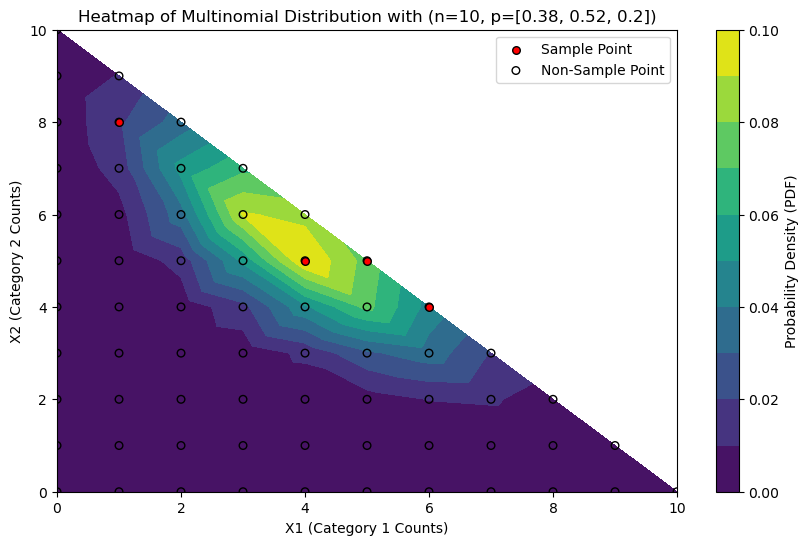

In [6]:
# Creating a plot displaying the multinomial pdf and the samples
plt.figure(figsize=(10, 6))
plt.tricontourf(x1, x2, pdf, levels=n, cmap='viridis')
plt.colorbar(label='Probability Density (PDF)')

scatter_non_sample = plt.scatter(x1, x2, edgecolor='k', facecolors='none', s=30,
                                 label='Non-Sample Point')

scatter_sample = plt.scatter([s[0] for s in sample_points], [s[1] for s in sample_points],
                             color='red', edgecolor='k', s=30, label='Sample Point')
# Labels for the plot
plt.xlabel('X1 (Category 1 Counts)')
plt.ylabel('X2 (Category 2 Counts)')
plt.title(f'Heatmap of Multinomial Distribution with (n={n}, p={p})')
plt.legend(handles=[scatter_sample, scatter_non_sample])
plt.show()

In [7]:
# Creating the dirichlet simplex
p_ = np.linspace(0, 1, 100)
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()

p1 = (p1[np.newaxis, :]*p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :]*p_[:, np.newaxis]).flatten() 
p3 = 1 - p1 - p2

p = np.c_[p1, p2, p3]

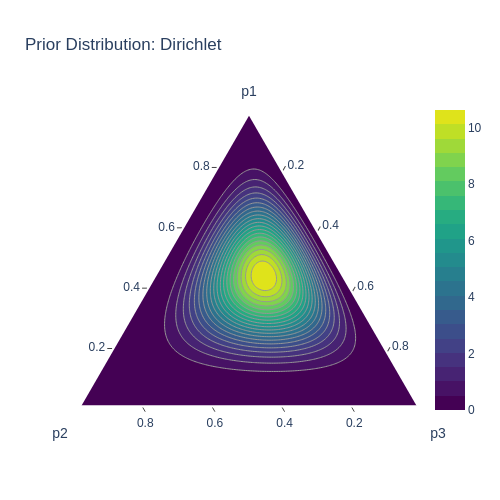

In [8]:
# Ternary plot for the dirichlet prior
alpha_prior = np.array([ALPHA1, ALPHA2, ALPHA3])
dirichlet_prior = stats.dirichlet(alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T) 

fig1 = ff.create_ternary_contour(
    p.T,                         
    dirichlet_prior.pdf(p.T),
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    ncontours=20,
    colorscale='Viridis',
    title=dict(
        text='Prior Distribution: Dirichlet'),
    showscale=True
    )
fig1.show('png')

In [9]:
# Acquiring updated values for posteriori dirichlet
s1 = 0
s2 = 0
s3 = 0
for point in random_sample:
    s1 += point[0]
    s2 += point[1]
    s3 += point[2]

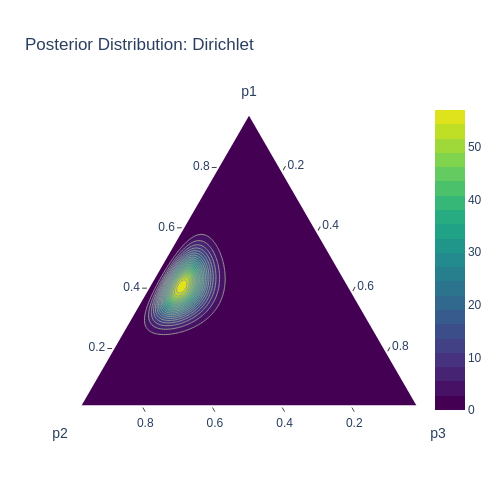

In [10]:
# Ternary plot for the dirichlet posterior
alpha_posterior = np.array([ALPHA1 + s1, ALPHA2 + s2, ALPHA3 + s3])  # Update prior alpha values
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

fig2 = ff.create_ternary_contour(
    p.T,
    dirichlet_posterior.pdf(p.T),
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    ncontours=20,
    colorscale='Viridis',
    title=dict(
        text='Posterior Distribution: Dirichlet'),
    showscale=True
    )

fig2.show('png')